# 3장. 분류

https://nbviewer.jupyter.org/github/rickiepark/handson-ml/tree/master/

이 코드의 내용은 Hands-On Machine Learning with Scikit-Learn & TensorFlow을 참고했음을 밝힙니다.

In [2]:
# fetch_mldata는 0.22 버전에서 삭제될 예정입니다.
# 0.20에서 관련된 경고를 피하기 위해 대신 ftech_openml 함수를 사용하는 것이 좋습니다.

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  '

In [3]:
X, y = mnist['data'], mnist['target']
X.shape # 28*28 = 784(pixels), 개개의 특성은 단순히 0(흰색)부터 255(검은색)까지의 픽셀 강도를 나타낸다.

(70000, 784)

In [4]:
y.shape

(70000,)

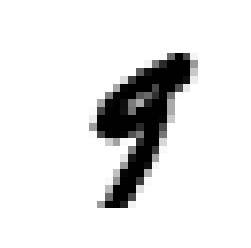

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,
          interpolation='nearest')
plt.axis('off')
plt.show()

In [6]:
some_digit_image # 0부터 255사이의 수(진할수록 높은 값)를 가지고 있는 배열

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [7]:
y[36000]

'9'

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
# 훈련 세트를 섞어서 모든 교차 검증 폴드가 비슷해지도록 만든다.

import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

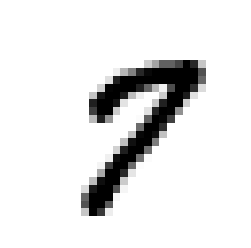

In [11]:
some_digit = X_train[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,
          interpolation='nearest')
plt.axis('off')
plt.show()

In [12]:
# 이진분류

y_train_7 = (y_train=='7') # 7은 True고, 다른 숫자는 모두 False
y_test_7 = (y_test=='7')

## 확률적 경사하강법(SGD, Stochastic Gradient Descent)

* SGDClassifier
* 매우 큰 데이터셋을 효율적으로 처리하는 장점을 지니고 있습니다.
* 한 번에 하나씩 훈련 샘플을 독립적으로 처리합니다(그래서 SGD가 온라인 학습에 잘 들어맞습니다).
* SGDClassifier는 훈련하는 데 무작위성을 사용합니다(그래서 이름에 '확률적'이 붙었습니다). 결과를 재현하고 싶다면 random_state 매개변수를 지정해야 합니다.

In [13]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(X_train, y_train_7)

C:\Users\mycom\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [14]:
sgd_clf.predict([some_digit])

array([ True])

## 교차 검증 구현(p128)

In [15]:
# 다음 코드는 사이킷런의 cross_val_score() 함수와 거의 같은 작업을 수행하고 동일한 결과를 출력합니다.

# sklearn.base.clone(estimator, safe=True)
# Constructs a new estimator with the same parameters.
# Clone does a deep copy of the model in an estimator without actually copying attached data.
# It yields a new estimator with the same parameters that has not been fit on any data.

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

sgd_clf = SGDClassifier(max_iter=5, random_state=42)

# StratifiedKFold는 클래스별 비율이 유지되도록 폴드를 만들기 위해 계층적 샘플링을 수행합니다.
skfolds = StratifiedKFold(n_splits=3, random_state=42)

# 매 반복에서 분류기 객체를 복제하여 훈련 폴드로 훈련시키고 테스트 폴드로 예측을 만듭니다.
# 그런 다음 올바른 예측의 수를 세어 정확한 예측의 비율을 출력합니다.
for train_index, test_index in skfolds.split(X_train, y_train_7):
    clone_clf = clone(sgd_clf) # 새롭게 훈련을 하기 위해  clone으로 모델 복사(파라미터만 복사)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_7[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_7[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred==y_test_fold)
    print(n_correct/len(y_pred))

C:\Users\mycom\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


0.9613019349032549


C:\Users\mycom\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


0.98045


C:\Users\mycom\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


0.9781989099454973


Q 128) clone - fit - predict?

## StratifiedKFold

In [1]:
import numpy as np
seed = 0
np.random.seed(seed)
 

# 원소가 9개인 numpy 배열을 생성한다
# Y값은 0이 3개, 1은 6개로 비율은 1:2이다 (불균형데이터)
X = np.array([-5, -3, -1, 1, 3, 5, 7, 9, 11])
Y = np.array([0, 0, 0, 1, 1, 1, 1, 1, 1])
 
splits = 3

In [2]:
# StratifiedKFold
# Stratified하게 트레이닝셋과 테스트셋으로 나눈다
# KFold기법에 의해 test에 선택된 인덱스는 겹치지 않도록 한다
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=splits, shuffle=True, random_state=seed)
 
print(kfold)
print("="*100)
for train_index, test_index in kfold.split(X, Y):
    print("train Index:", train_index)
    print("test index:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    print("-"*100)

StratifiedKFold(n_splits=3, random_state=0, shuffle=True)
train Index: [0 1 3 4 6 8]
test index: [2 5 7]
----------------------------------------------------------------------------------------------------
train Index: [0 2 3 5 7 8]
test index: [1 4 6]
----------------------------------------------------------------------------------------------------
train Index: [1 2 4 5 6 7]
test index: [0 3 8]
----------------------------------------------------------------------------------------------------


In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_7, cv=3, scoring='accuracy')

C:\Users\mycom\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\mycom\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\mycom\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassif

array([0.96130193, 0.98045   , 0.97819891])

In [17]:
# 모든 이미지를 '7아님' 클래스로 분류하는 더미 분류기

from sklearn.base import BaseEstimator

class Never7Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass # fit을 할 필요가 없기 때문에 단순히 pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [18]:
never_7_clf = Never7Classifier()
cross_val_score(never_7_clf, X_train, y_train_7, cv=3, scoring='accuracy')

array([0.89125, 0.8993 , 0.8962 ])

이 예제는 정확도를 분류기의 성능 측정 지표로 선호하지 않는 이유를 보여줍니다. 특히 불균형한 데이터셋을 다룰 때(즉, 어떤 클래스가 다른 것보다 월등히 많은 경우) 더욱 그렇습니다.

## 오차 행렬(confusion matrix)(p129)

* 분류기의 성능을 평가하는 더 좋은 방법
* 클래스 A의 샘플이 클래스 B로 분류된 횟수를 세는 것 ex) 분류기가 숫자 5의 이미지를 3으로 잘못 분류한 횟수를 알고 싶다면 오차 행렬의 5행 3열을 보면 된다.

In [19]:
# cross_val_predict() 함수는 cross_val_score() 함수처럼 K-겹 교차 검증을 수행하지만 평가 점수를 반환하지 않고 각 테스트 폴드에서 얻은 예측을 반환합니다.
# 즉, 훈련 세트의 모든 샘플에 대해 깨끗한 예측을 얻게 됩니다(여기서 깨끗하다는 뜻은 모델이 훈련하는 동안 보지 못했던 데이터에 대해 예측했다는 의미입니다).

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_7, cv=3)

C:\Users\mycom\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\mycom\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\mycom\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassif

In [20]:
y_train_pred

array([False, False, False, ..., False, False, False])

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_7, y_train_pred)

array([[52690,  1045],
       [  556,  5709]], dtype=int64)

오차 행렬의 행은 실제 클래스를 나타내고 열은 예측한 클래스를 나타냅니다. 이 행렬의 첫 번째 행은 '7 아님' 이미지(음성 클래스, negativs class)에 대한 것으로, 53,139개를 '7 아님'으로 정확하게 분류했고(진짜 음성, true negavitve), 나머지 596개는 '7'이라고 잘못 분류했습니다(거짓 양성, false positive). 두 번째 행은 '7' 이미지(양성 클래스, positive class)에 대한 것으로, 790개를 '7 아님'으로 잘못 분류했고(거짓 양성, false positive) 나머지 5,475개를 정확히 '7'이라고 분류했습니다(진짜 양성, true positive). 완벽한 분류기라면 진짜 양성과 진짜 음성만 가지고 있을 것이므로 오차 행렬의 주대각선(왼쪽 위에서 오른쪽 아래로)만 0이 아닌 값이 됩니다.  
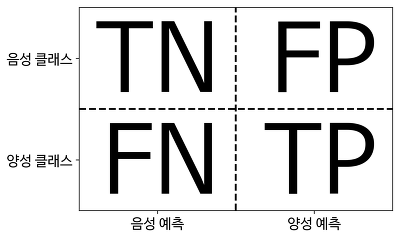

In [22]:
y_train_perfect_predictions = y_train_7
confusion_matrix(y_train_7, y_train_perfect_predictions)

array([[53735,     0],
       [    0,  6265]], dtype=int64)

## 정밀도(precision)(p130)

* 양성 예측의 정확도
* 정밀도 = TP/(TP + FP)
* TP : 진짜 양성의 수, FP : 거짓 양성의 수
* 날씨 예측 모델이 맑다고 예측했는데, 실제 날씨가 맑았는지를 살펴보는 지표(모델의 입장에서)
* 확실한 양성 샘플 하나만 예측하면 간단히 완벽한 정밀도를 얻을 수 있지만(정밀도 = 1/1 = 100%), 이는 분류기가 다른 모든 양성 샘플을 무시하기 때문에 그리 유용하지 않습니다.

## 재현율(recall)(p131)

* 분류기가 정확하게 감지한 양성 샘플의 비율
* 재현율 = 민감도(sensitivity) = 진짜 양성 비율(true positive rate, TPR)
* 재현율 = TP/(TP + FN)
* FN : 거짓 음성의 수
* 실제 날씨가 맑은 날 중에서 모델이 맑다고 예측한 비율을 나타낸 지표(실제 정답의 입장에서)
* 당뇨병이 걸린 환자를 예측할 때(실제 당뇨병이 아닌 상황이 발생하더라도 당뇨병 환자를 찾는 것이 목적이기 때문에 재현율을 높인다, 즉 임계값을 낮춘다)

In [23]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_7, y_train_pred)) # TP/(TP+FP)
print(recall_score(y_train_7, y_train_pred)) # TP/(FN+TP)

0.8452768729641694
0.9112529928172386


## F1 점수(F1 score)(p132)

* 정밀도와 재현율의 조화 평균(harmonic mean)
* 정밀도와 재현율이 비슷한 분류기에서는 F1 점수가 높습니다.
* 상황에 따라 정밀도가 중요할 수도 있고 재현율이 중요할 수도 있습니다.
<br>  
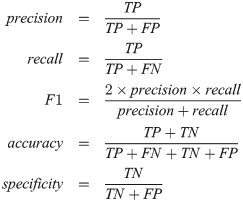

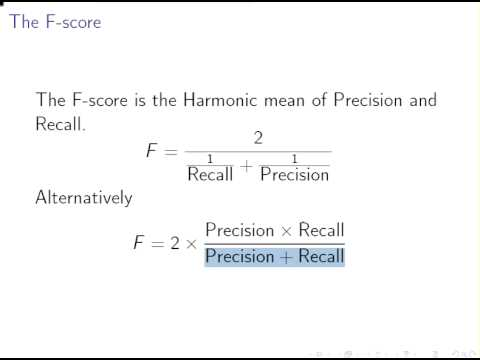

In [24]:
from sklearn.metrics import f1_score
f1_score(y_train_7, y_train_pred)

0.8770258852446425

## 정밀도/재현율 트레이드오프(p133)

* 어린아이에게 안전한 동영상을 걸러내는 분류기를 훈련시킨다고 가정해보겠습니다. 재현율은 높으나 정말 나쁜 동영상이 몇 개 노출되는 것보다 좋은 동영상이 많이 제외되더라도(낮은 재현율) 안전한 것들만 노출시키는(높은 정밀도) 분류기를 선호할 것입니다(이런 경우에는 분류기의 동영상 선택 결과를 확인하기 위해 사람이 참여하는 분석 파이프라인을 추가할지도 모릅니다).
* 감시 카메라를 통해 좀도둑을 잡아내는 분류기를 훈련시킨다고 가정해보겠습니다. 분류기의 재현율이 99%라면 정확도가 30%만 되더라도 괜찮을지 모릅니다(아마도 경비원이 잘못된 호출을 종종 받게 되겠지만, 거의 모든 좀도둑을 잡을 것입니다).
* 정밀도를 올리면 재현율이 줄고 그 반대도 마찬가지입니다.
* SGDClassifier 분류기는 결정 함수(decision function)를 사용하여 각 샘플의 점수를 계산합니다. 이 점수가 임계값(결정 임계값)보다 크면 샘플을 양성 클래스에 할당하고 그렇지 않으면 음성 클래스에 할당합니다.(p133 예시)

In [25]:
# 사이킷런에서 임계값을 직접 지정할 수는 없지만 예측에 사용한 점수는 확인할 수 있습니다.
# 분류기의 predict() 메서드 대신 decision_function() 메서드를 호출하면 각 샘플의 점수를 얻을 수 있습니다.
# 이 점수를 기반으로 원하는 임계값을 정해 예측을 만들 수 있습니다.

y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([275970.4552117])

In [26]:
# SGDClassifier의 임계값이 0이므로 predict() 메서드와 같은 결과(즉, True)를 반환합니다.
# 사실 predict() 메서드도 decision_function() 함수를 사용하여 0보다 큰 경우를 양성으로 예측합니다.
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [27]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [28]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
# cross_val_predict() 함수를 사용해 훈련 세트에 있는 모든 샘플의 점수를 구해야 합니다.
# 하지만 이번에는 예측 결과가 아니라 결정 점수를 반환받도록 지정해야 합니다.

y_scores = cross_val_predict(sgd_clf, X_train, y_train_7, cv=3,
                            method='decision_function')

C:\Users\mycom\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\mycom\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\mycom\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassif

In [30]:
y_scores

array([ -211915.98858864, -1036344.32973312,  -656010.53867469, ...,
       -1775821.61495726,  -597874.21092552,  -204122.94229407])

In [31]:
y_scores.shape

(60000,)

In [32]:
# 위의 점수로 precision_recall_curve() 함수를 사용하여 가능한 모든 임계값에 대해 정밀도와 재현율을 계산할 수 있습니다.

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_7, y_scores)

In [33]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

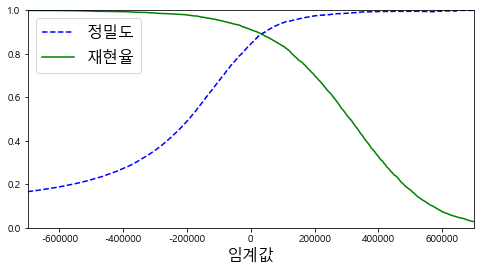

In [34]:
# 이제 맷플롯립을 이용해 임곗값의 함수로 정밀도와 재현율을 그릴 수 있습니다.

def plot_precision_recall_vs_threshold(precision, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='정밀도')
    plt.plot(thresholds, recalls[:-1], 'g-', label='재현율')
    plt.xlabel("임계값", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])
    
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()

정밀도 곡선이 재현율 곡선보다 왜 더 울퉁불퉁한지 의아할 수 있습니다. 이는 임곗값을 올리더라도 정밀도가 가끔 낮아질 때가 있기 때문입니다(일반적으로는 높아져야 합니다). 그 이유를 이해하기 위해 p131 그림을 다시 살펴보겠습니다. 가운데 임곗값에서 오른쪽으로 숫자 하나만큼 이동하면 어떻게 될까요? 정밀도는 4/5(80%)에서 3/4(75%)로 줄어듭니다. 반면 재현율은 임계값이 내려감에 따라 줄어들 수밖에 없어 부드러운 곡선이 됩니다.

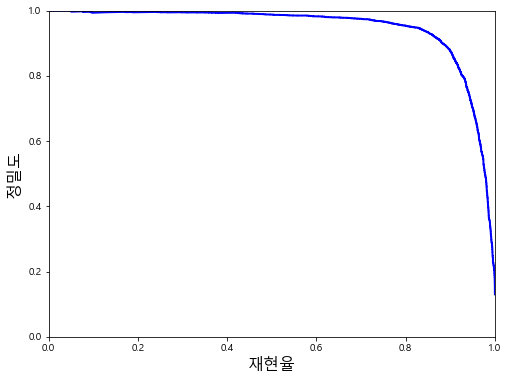

In [35]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("재현율", fontsize=16)
    plt.ylabel("정밀도", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

* 재현율에 대한 정밀도 곡선을 그리면 좋은 정밀도/재현율 트레이드오프를 선택하는 데 도움이 됩니다.
* 재현율 80% 근처에서 정밀도가 급격하게 줄어들기 시작합니다. 이 하강점 직전을 정밀도/재현율 트레이드오프로 선택하는 것이 좋습니다. 예를 들면 재현율이 60% 정도인 지점입니다. 물론 이런 선택은 프로젝트에 따라 달라집니다.
* average_precision_score() 함수를 사용하면 정밀도/재현율 곡선의 아래 면적을 계산할 수 있어서 서로 다른 두 모델을 비교하는 데 도움이 됩니다.

정밀도 90%를 달성하는 것이 목표라고 가정해봅시다. 34번 셀의 그래프에서 임곗값이 약 70,000 정도라는 것을 알 수 있습니다. (훈련 세트에 대한) 예측을 만들려면 분류기의 predict() 메서드를 호출하는 대신 다음 코드를 실행하면 됩니다.

In [36]:
y_train_pred_90 = (y_scores > 70000)

In [37]:
print(precision_score(y_train_7, y_train_pred_90))
print(recall_score(y_train_7, y_train_pred_90))

0.922801024765158
0.8624102154828411


누군가가 '99% 정밀도를 달성하자'라고 말하면 반드시 '재현율 얼마에서?'라고 물어봐야 합니다.

## ROC곡선(p137)

* 수신기 조작 특성(ROC, receiver operating characteristic) 곡선
* 이진 분류에서 널리 사용하는 도구
* 정밀도/재현율 곡선과 매우 비슷하지만, ROC 곡선은 정밀도에 대한 재현율 곡선이 아니고 거짓 양성 비율(FPR, false positive rate)에 대한 진짜 양성 비율(TPR, true positive rate)의 곡선입니다.
* 양성으로 잘못 분류된 음성 샘플의 비율이 FPR입니다. 이는 1에서 음성으로 정확하게 분류한 음성 샘플의 비율인 진짜 음성 비율(TNR, true negative rate)을 뺀 값입니다. TNR을 특이도(specificity)라고도 합니다.
* ROC 곡선은 민감도(재현율)에 대한 1-특이도 그래프입니다.
* FPR = FP/(FP+TN) = (FP+TN-TN)/FP+TN = 1 - TN/(FP+TN) = 1 - TNR
<br>  
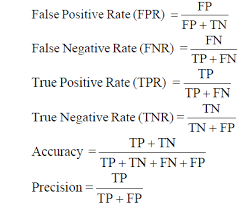

In [39]:
# ROC 곡선을 그리려면 먼저 roc_curve() 함수를 사용해 여러 임곗값에서 TPR과 FPR을 계산해야 합니다.

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_7, y_scores)

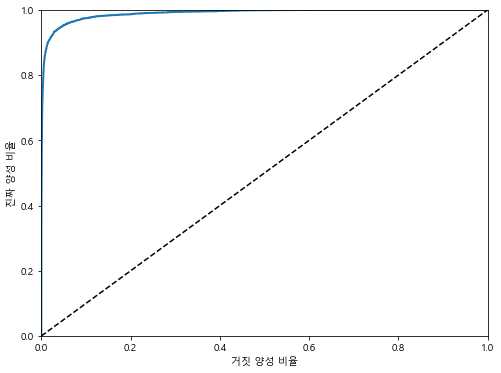

In [49]:
# 그러면 맷플롯립을 사용해 TPR에 대한 FPR 곡선을 나타낼 수 있습니다.

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('거짓 양성 비율')
    plt.ylabel('진짜 양성 비율')
    
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

* 여기에서도 트레이드오프가 있습니다. 재현율(TPR)이 높을수록 분류기가 만드는 거짓 양성(FPR)이 늘어납니다. 점선은 완전한 랜덤 분류기의 ROC 곡선을 뜻합니다. 좋은 분류기는 이 점선으로부터 최대한 멀리 떨어져 있어야 합니다(왼쪽 위 모서리).
* ROC 곡선이 정밀도/재현율(PR) 곡선과 비슷해서 어떤 것을 사용해야 할지 궁금할 수 있습니다. 일반적인 법칙은 양성 클래스가 드물거나 거짓 음성보다 거짓 양성이 더 중요할 때 PR(Precision/Recall) 곡선을 사용하고 그렇지 않으면 ROC 곡선을 사용합니다. 예를 들어 조금 전의 ROC 곡선(그리고 ROC의 AUC 점수)을 보면 매우 좋은 분류기라고 생각할 수 있습니다. 하지만 이는 음성(7 아님)에 비해 양성(7)이 크게 적기 때문입니다. 이와는 다르게 PR 곡선은 분류기의 성능 개선 여지가 얼마나 되는지(오른쪽 위 모서리에 가까워질 수 있는지) 잘 보여줍니다.

Q) 위의 내용

## AUC(area under the curve)(p138)

곡선 아래의 면적(AUC, area under the curve)을 측정하면 분류기들을 비교할 수 있습니다. 완벽한 분류기는 ROC의 AUC가 1이고, 완전한 랜덤 분류기는 0.5입니다. 사이킷런은 ROC의 AUC를 계산하는 함수를 제공합니다.

랜덤 분류기는 훈련 데이터의 클래스 비율을 따라 무작위로 예측하는 것을 말합니다. 이렇게 되면 오차 행렬의 실제 클래스가 비슷한 비율의 예측 클래스로 나뉘어 FPR과 TPR 값이 비슷해집니다. 결국 ROC 곡선이 y=x에 가깝게 되어 AUC 면적이 0.5가 됩니다. 사이킷런의 DummyClassifier에서 랜덤 분류기를 제공합니다.

In [41]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_7, y_scores)

0.9893899825122414

RandomForestClassifier를 훈련시켜 SGDClassifier의 ROC 곡선과 ROC AUC 점수를 비교해보겠습니다. 먼저 훈련 세트의 샘플에 대한 점수를 얻어야 합니다. 하지만 작동 방식의 차이 때문에 RandomForestClassifier에는 decision_function() 메서드가 없습니다. 대신 predict_proba() 메서드가 있습니다. 사이킷런 분류기는 일반적으로 이 두 메서드 중 하나 또는 둘 모두를 가지고 있습니다. predict_proba() 메서드는 샘플이 행, 클래스가 열이고 샘플이 주어진 클래스에 속할 확률을 담은 배열을 반환합니다(예를 들어 어떤 이미지가 7일 확률 70%).

In [42]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=10, random_state=42) # 랜덤 포레스트 n_estimator 매개변수의 기본값이 0.22 버전에서 10에서 100으로 변경될 예정입니다. 경고를 피하기 위해서 n_estimator=10으로 지정합니다.
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_7, cv=3,
                                   method='predict_proba')

In [43]:
# 하지만 ROC 곡선을 그리려면 확률이 아니라 점수가 필요합니다.
# 간단한 해결 방법은 양성 클래스의 확률을 점수로 사용하는 것입니다.

y_scores_forest = y_probas_forest[:,1] # 양성 클래스에 대한 확률을 점수로 사용합니다.
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_7, y_scores_forest)

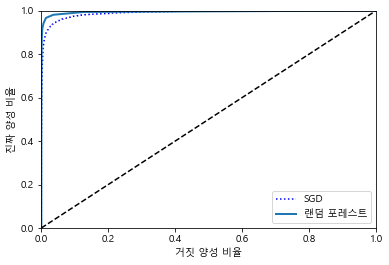

In [44]:
plt.plot(fpr, tpr, 'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, '랜덤 포레스트')
plt.legend(loc='lower right')
plt.show()

RandomForestClassifier의 ROC 곡선이 왼쪽 위 모서리에 더 가까워 SGDClassifier보다 훨씬 좋아 보입니다. 당연하게 ROC AUC 점수도 훨씬 높습니다.

In [45]:
roc_auc_score(y_train_7, y_scores_forest)

0.9943609645959216

In [46]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_7, cv=3)
precision_score(y_train_7, y_train_pred_forest)

0.9843611160476275

In [47]:
recall_score(y_train_7, y_train_pred_forest)

0.8841181165203511

## 다중 분류(p141)

* 이중 분류기 : 두 개의 클래스를 구별
* 다중 분류기(multiclass classifier 또는 다항 분류기(multinomial classifier)) : 둘 이상의 클래스를 구별
* 랜덤 포레스트 분류기나 나이브 베이즈(navie Bayes) 분류기 같은 일부 알고리즘은 여러 개의 클래스를 직접 처리할 수 있는 반면, 서포트 벡터 머신 분류기나 선형 분류기 같은 다른 알고리즘은 이진 분류만 가능합니다. 하지만 이진 분류기를 여러 개 사용해 다중 클래스를 분류하는 기법도 많습니다.
* 예를 들어 특정 숫자 하나만 구분하는 숫자별 이진 분류기 10개(0에서부터 9까지)를 훈련시켜 클래스가 10개인 숫자 이미지 분류 시스템을 만들 수 있습니다. 이미지를 분류할 때 각 분류기의 결정 점수 중에서 가장 높은 것을 클래스로 선택하면 됩니다. 이를 일대다(one-versus-all, one-versus-the-rest, OvA) 전략이라고 합니다.
* 또 다른 전략은 0과 1 구별, 0과 2 구별, 1과 2 구별 등과 같이 각 숫자의 조합마다 이진 분류기를 훈련시키는 것입니다. 이를 일대일(one-versus-one, OvO) 전략이라고 합니다. 클래스가 N개라면 분류기는 N\*(N-1)/2개가 필요합니다.
* OvO 전략의 주요 장점은 각 분류기의 훈련에 전체 훈련 세트 중 구별할 두 클래스에 해당하는 샘플만 필요하다는 것입니다. (서포트 벡터 머신 같은) 일부 알고리즘은 훈련 세트의 크기에 민감해서 큰 훈련 세트에서 몇 개의 분류기를 훈련시키는 것보다 작은 훈련 세트에서 많은 분류기를 훈련시키는 쪽이 빠르므로 OvO를 선호합니다. 하지만 대부분의 이진 분류 알고리즘에서는 OvA를 선호합니다.
* 다중 클래스 분류 작업에 이진 분류 알고리즘을 선택하면 사이킷런이 자동으로 감지해 OvA(SVM 분류기일 때는 OvO)를 적용합니다.

n개의 원소에서 k개를 뽑을 수 있는 조합의 수인 이항 계수의 공식
*  nCk = n!/k!(n-k)!

N개의 클래스에서 2개씩 뽑는 조합의 수
* NC2 = N!/2!(N-2)! = N*(N-1)/2

In [50]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

C:\Users\mycom\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


array(['7'], dtype='<U1')

내부에서는 사이킷런이 실제로 10개의 이진 분류기를 훈련시키고 각각의 결정 점수를 얻어 점수가 가장 높은 클래스를 선택합니다.

In [51]:
# decision_function() 메서드는 샘플당 하나의 점수가 아니라 클래스마다 하나씩, 총 10개의 점수를 반환합니다.

some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-587621.94739741, -525474.06479642, -642639.66111785,
        -456876.16773636, -292210.33590389, -390540.77958566,
        -955334.38701712,  275970.4552117 , -400184.88817918,
        -119976.70998298]])

가장 높은 점수가 클래스 7에 해당하는 값입니다.

In [52]:
np.argmax(some_digit_scores)

7

In [53]:
sgd_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

In [54]:
sgd_clf.classes_[7]

'7'

분류기가 훈련될 때 classes_ 속성에 타깃 클래스의 리스트를 값으로 정렬하여 저장합니다. 위 예제에서는 classes_ 배열에 있는 각 클래스의 인덱스가 클래스 값 자체와 같습니다(즉, 인덱스 7에 해당하는 클래스의 값은 7입니다). 하지만 일반적으로 이런 경우는 드뭅니다.

In [55]:
# 사이킷런에서 OvO나 OvA을 사용하도록 강제하려면 OneVsOneClassifier나 OneVsRestClassifier를 사용합니다.
# 간단하게 이진 분류기 인스턴스를 만들어 객체를 생성할 때 전달하면 됩니다.
# 예를 들어 다음 코드는 SGDClassifier 기반으로 OvO 전략을 사용하는 다중 분류기를 만듭니다.

from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

C:\Users\mycom\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\mycom\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\mycom\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassif

C:\Users\mycom\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\mycom\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\mycom\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassif

C:\Users\mycom\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\mycom\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\mycom\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassif

array(['7'], dtype=object)

In [56]:
len(ovo_clf.estimators_) # 10*9/2 = 45개의 분류기 훈련

45

In [57]:
# RandomForestClassifier를 훈련시키는 것도 간단합니다.

forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array(['7'], dtype=object)

이 경우 랜덤 포레스트 분류기는 직접 샘플을 다중 클래스로 분류할 수 있기 때문에 별도로 사이킷런의 OvA나 OvO를 적용할 필요가 없습니다.

In [58]:
# predict_proba() 메서드를 호출하면 분류기가 각 샘플에 부여한 클래스별 확률을 얻을 수 있습니다.

forest_clf.predict_proba([some_digit])

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

이 결과에서 분류기가 예측 결과에 강한 확신을 보이고 있음을 알 수 있습니다.

분류기 평가에는 일반적으로 교차 검증을 사용합니다. cross_val_score() 함수를 사용해 SGDClassifier의 정확도를 평가해보겠습니다.

In [59]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

C:\Users\mycom\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\mycom\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\mycom\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassif

array([0.87422515, 0.8420421 , 0.85227784])

모든 테스트 폴드에서 84% 이상을 얻었습니다. 랜덤 분류기를 사용했다면 10% 정확도를 얻었을 것이므로 이 점수가 아주 나쁘지는 않지만 성능을 더 높일 여지가 있습니다. 예를 들어 간단하게 입력의 스케일을 조정하면 (2장에서처럼) 정확도를 90% 이상으로 높일 수 있습니다.

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

C:\Users\mycom\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\mycom\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\mycom\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassif

array([0.91126775, 0.90939547, 0.90693604])

## 에러 분석(p144)

이 절에서는 가능성이 높은 모델을 하나 찾았다고 가정하고 이 모델의 성능을 향상시킬 방법을 찾아보겠습니다. 한 가지 방법은 만들어진 에러의 종류를 분석하는 것입니다. 먼저 오차 행렬을 살펴볼 수 있습니다. cross_val_predict() 함수를 사용해 예측을 만들고 이전처럼 confusion_matrix() 함수를 호출합니다.

In [64]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

C:\Users\mycom\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\mycom\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\mycom\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassif

array([[5746,    2,   19,   10,   11,   42,   43,   10,   38,    2],
       [   1, 6464,   50,   27,    6,   46,    6,   13,  119,   10],
       [  57,   34, 5323,   96,   75,   26,  103,   59,  167,   18],
       [  49,   43,  134, 5320,    5,  251,   40,   54,  137,   98],
       [  18,   26,   35,   10, 5389,   10,   55,   34,   80,  185],
       [  74,   43,   37,  180,   78, 4608,  112,   25,  174,   90],
       [  31,   23,   39,    2,   45,   93, 5630,    6,   49,    0],
       [  24,   23,   72,   27,   53,   11,    3, 5805,   14,  233],
       [  53,  157,   78,  151,   16,  171,   61,   26, 4987,  151],
       [  44,   34,   28,   81,  175,   40,    3,  189,   75, 5280]],
      dtype=int64)

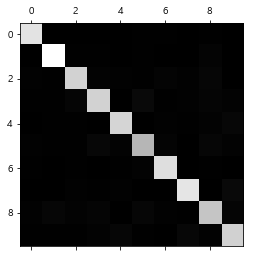

In [65]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

이 오차 행렬은 대부분의 이미지가 올바르게 분류되었음을 나타내는 주대각선이 있으므로 매우 좋아 보입니다. 숫자 5는 다른 숫자보다 조금 더 어두워 보입니다. 배열에서 가장 큰 값은 흰색으로, 가장 작은 값은 검은색으로 정규화되어 그려집니다. 이는 데이터셋에 숫자 5의 이미지가 적거나 분류기가 숫자 5를 다른 숫자만큼 잘 분류하지 못한다는 뜻입니다. 사실 두 경우에 대해 모두 확인해봐야 합니다.

그래프의 에러 부분에 초점을 맞춰보겠습니다. 먼저 오차 행렬의 각 값을 대응되는 클래스의 이미지 개수로 나누어 (에러의 절대 개수가 아니라) 에러 비율을 비교합니다(개수로 비교하면 이미지가 많은 클래스가 상대적으로 나쁘게 보입니다).

In [66]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

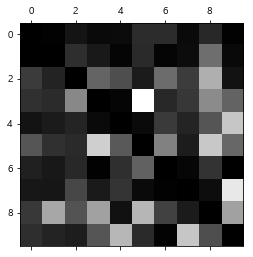

In [67]:
# 다른 항목들은 그대로 유지하고 주대각선만 0으로 채워서 그래프를 그립시다.

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

여기서 분류기가 만든 에러를 확실히 볼 수 있습니다. 행은 실제 클래스를 나타내고 열은 예측한 클래스를 나타낸다는 사실을 기억하세요. 클래스 8과 9의 열이 상당히 밝으므로 많은 이미지가 8과 9로 잘못 분류되었음을 암시합니다. 비슷하게 클래스 8과 9의 행도 밝으므로 숫자 8과 9가 다른 숫자들과 혼돈이 자주 된다는 것을 말해주고 있습니다. 반대로 클래스 1의 열은 매우 어두우므로 대부분의 숫자 1이 정확하게 분류되었음을 의미합니다(몇 개는 숫자 8과 혼돈되었지만 그 정도가 전부입니다). 에러가 정확하게 대칭이 아니라는 점을 주목하세요. 예를 들어 숫자 5가 8로 잘못 분류된 경우가, 반대로 숫자 8이 5로 잘못 분류된 경우보다 많습니다.

오차 행렬을 분석하면 분류기의 성능 향상 방안에 대한 통찰을 얻을 수 있습니다. 이 그래프를 살펴보면 3과 5가 서로 혼돈되는 것을 보완하고 8과 9를 더 잘 분류할 수 있도록 개선할 필요가 있어 보입니다. 예를 들어 이 숫자들에 대한 훈련 데이터를 더 모을 수 있습니다. 또는 분류기에 도움 될 만한 특성을 더 찾아볼 수 있습니다. 예를 들어 동심원의 수를 세는 알고리즘 같은 것입니다(즉, 8은 두 개, 6은 하나, 5는 0개입니다). 또는 동심원 같은 어떤 패턴이 드러나도록(Scikit-Image, Pillow, OpenCV 등을 사용해서) 이미지를 전처리해볼 수 있습니다.

개개의 에러를 분석해보면 분류기가 무슨 일을 하고 있고, 왜 잘못되었는지에 대해 통찰을 얻을 수 있지만, 더 어렵고 시간이 오래 걸립니다. 예를 들어 3과 5의 샘플을 그려보겠습니다(plot_digits()는 단순히 맷플롯립의 imshow() 함수를 사용하는 함수입니다.)

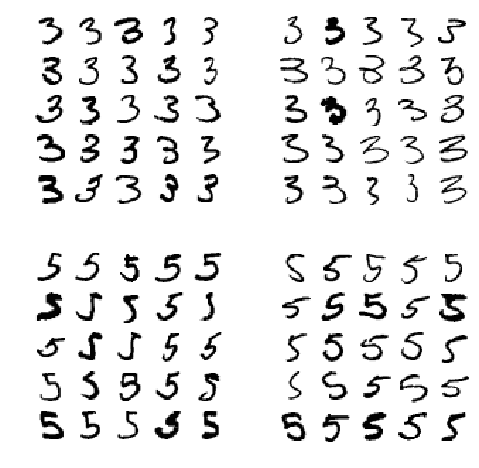

In [72]:
# 숫자 그림을 위한 추가 함수
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

cl_a, cl_b = '3', '5'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

* 왼쪽의 5\*5 블록 두 개는 3으로 분류된 이미지이고 오른쪽 5\*5 블록 두 개는 5로 분류된 이미지입니다. 분류기가 잘못 분류한 숫자 중 일부는 정말 잘못 쓰여 있어서 사람도 분류하기 어려울 것 같습니다. 그러나 대부분의 잘못 분류된 이미지는 확실히 에러인 것 같고 분류기가 실수한 이유를 이해하기 어렵습니다(사람의 뇌가 환상적인 패턴 인식 시스템이라는 것을 기억하세요. 시각 시스템에서는 어떤 정보가 인식되기 전에 매우 많은 전처리를 수행합니다. 그래서 간단하게 보인다고 해도 진짜로 간단한 일이 아닐 수 있습니다). 원인은 선형 모델인 SGDClassifier를 사용했기 때문입니다. 선형 분류기는 클래스마다 픽셀에 가중치를 할당하고 새로운 이미지에 대해 단순히 픽셀 강도의 가중치 합을 클래스의 점수로 계산합니다. 따라서 3과 5는 몇 개의 픽셀만 다르기 때문에 모델이 쉽게 혼동하게 됩니다.
* 3과 5의 주요 차이는 위쪽 선과 아래쪽 호를 이어주는 작은 직선의 위치입니다. 숫자 3을 쓸 때 연결 부위가 조금 왼쪽으로 치우치면 분류기가 5로 분류하고, 또 반대도 마찬가지입니다. 다른 말로 하면 분류기는 이미지의 위치나 회전 방향에 매우 민감합니다. 3과 5의 에러를 줄이는 한 가지 방법은 이미지를 중앙에 위치시키고 회전되어 있지 않도록 전처리하는 것입니다. 이렇게 하면 아마 다른 에러도 줄어들 것입니다.

## 다중 레이블 분류(p148)

분류기가 샘플마다 여러 개의 클래스를 출력해야 할 때도 있습니다. 얼굴 인식 분류기를 한번 생각해봅시다. 같은 사진에 여러 사람이 등장한다면 어떻게 해야 할까요? 당연히 인식된 사람마다 레이블을 하나씩 할당해야 합니다. 분류기가 앨리스, 밥, 찰리 세 얼굴을 인식하도록 훈련되었다고 가정해봅시다. 한 사진에 앨리스와 찰래기 있으면 분류기는 [1,0,1]을 출력해야 합니다(즉, '앨리스 있음, 밥 없음, 찰리 있음'). 이처럼 여러 개의 이진 레이블을 출력하는 분류 시스템을 다중 레이블 분류(multilabel classification) 시스템이라고 합니다.

In [76]:
from sklearn.neighbors import KNeighborsClassifier

y_train = y_train.astype(np.int64)

y_train_large = (y_train>=7)
y_train_odd = (y_train%2==1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

KNeighborsClassifier, 결정 트리, 랜덤 포레스트, OneVsRestClassifier에서 다중 레이블 분류를 지원합니다.

In [77]:
knn_clf.predict([some_digit])

array([[ True,  True]])

다중 레이블 분류기를 평가하는 방법은 많습니다. 적절한 지표는 프로젝트에 따라 다릅니다. 예를 들어 각 레이블의 F1 점수를 구하고 (또는 앞서 언급한 어떤 이진 분류 지표를 사용하여) 간단하게 평균 점수를 계산합니다.

In [78]:
# 다음 코드는 모든 레이블에 대한 F1 점수의 평균을 계산합니다.
# 경고: 다음 셀은 실행하는데 매우 오래 걸립니다(하드웨어에 따라 몇 시간이 걸릴 수 있습니다).

y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1)
f1_score(y_multilabel, y_train_knn_pred, average='macro')

# 0.9768224011622285

KeyboardInterrupt: 

실제로는 아닐 수 있지만 이 코드는 모든 레이블의 가중치가 같다고 가정한 것입니다. 특히 앨리스 사진이 밥이나 찰리 사진보다 훨씬 많다면 앨리스 사진에 대한 분류기의 점수에 더 높은 가중치를 둘 것입니다. 간단한 방법은 레이블에 클래스의 지지도(support, 타깃 레이블에 속한 샘플 수)를 가중치로 주는 것입니다. 이렇게 하려면 이전 코드에서 average='weight'로 설정하면 됩니다.

## 다중 출력 분류(p150)

* 다중 출력 다중 클래스 분류(multioutput-multiclass classification) 또는 간단히 다중 출력 분류(multioutput classification)
* 다중 레이블 분류에서 한 레이블이 다중 클래스가 될 수 있도록 일반화한 것입니다(즉, 값을 두 개 이상 가질 수 있습니다).

이를 위해 이미지에서 노이즈를 제거하는 시스템을 만들어보겠습니다. 노이즈가 많은 숫자 이미지를 입력으로 받고 (기대하건대) 깨끗한 숫자 이미지를 MNIST 이미지처럼 픽셀의 강도를 담은 배열로 출력합니다. 분류기의 출력이 다중 레이블(픽셀당 한 레이블)이고 각 레이블은 여러 개의 값을 가집니다(0부터 255까지 픽셀 강도). 그러므로 이 예는 다중 출력 분류 시스템입니다.
* 이 예에서처럼 분류와 회귀 사이의 경계는 때때로 모호합니다. 확실히 픽셀 강도 예측은 분류보다 회귀와 비슷합니다. 더욱이 다중 출력 시스템이 분류 작업에 국한되지도 않습니다. 그래서 샘플마다 클래스와 값을 모두 포함하는 다중 레이블이 출력되는 시스템도 가능합니다.

In [79]:
# 먼저 MNIST 이미지에서 추출한 훈련 세트와 테스트 세트에 넘파이의 randint() 함수를 사용하여 픽셀 강도에 노이즈를 추가하겠습니다.
# 타깃 이미지는 원본 이미지가 될 것입니다.

noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod =  X_train
y_test_mod = X_test

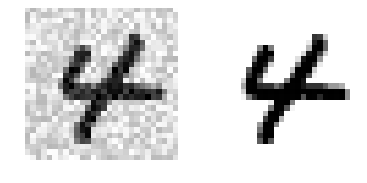

In [81]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

# 왼쪽이 노이즈가 섞인 입력 이미지이고 오른쪽이 깨끗한 타깃 이미지입니다.
some_index = 5500
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

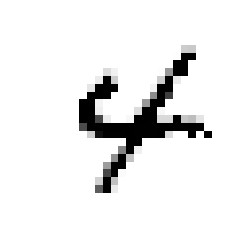

In [83]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)